In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [5]:
dataIris = load_iris()
dir(dataIris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [11]:
df = pd.DataFrame(
        dataIris['data'],
        columns=['SL','SW','PL','PW'])
df
df['target'] = dataIris['target']
df['spesies'] = df['target'].apply(lambda x : dataIris['target_names'][x])
df.head

<bound method NDFrame.head of       SL   SW   PL   PW  target    spesies
0    5.1  3.5  1.4  0.2       0     setosa
1    4.9  3.0  1.4  0.2       0     setosa
2    4.7  3.2  1.3  0.2       0     setosa
3    4.6  3.1  1.5  0.2       0     setosa
4    5.0  3.6  1.4  0.2       0     setosa
..   ...  ...  ...  ...     ...        ...
145  6.7  3.0  5.2  2.3       2  virginica
146  6.3  2.5  5.0  1.9       2  virginica
147  6.5  3.0  5.2  2.0       2  virginica
148  6.2  3.4  5.4  2.3       2  virginica
149  5.9  3.0  5.1  1.8       2  virginica

[150 rows x 6 columns]>

### 1. Standardize

In [14]:
scaler = StandardScaler()
scaler.fit(df[['SL','SW','PL','PW']])
xsd = scaler.transform((df[['SL','SW','PL','PW']]))

### Covariance Matrix

In [16]:
covXsd = np.cov(xsd.T)
covXsd

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### 3. Eigen Values & Eigen Vectors

In [19]:
eival,eivec = np.linalg.eig(covXsd)
eival,eivec

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

### 4. Tentukan Princopal Component

- Diambil 2 principal components, maka :

In [23]:
persenPC1 = eival[0] / eival.sum()
persenPC2 = eival[1] / eival.sum()
persenTotal = persenPC1 + persenPC2
print(persenPC1)
print(persenPC2)
print(persenTotal)

0.7296244541329985
0.2285076178670178
0.9581320720000163


In [25]:
pc1 = xsd.dot(eivec.T[0])
pc2 = xsd.dot(eivec.T[1])

In [29]:
df2 = pd.DataFrame({
    'pc1': pc1,'pc2':pc2,'target':df['target']
})
df2.head()

,pc1,pc2,target
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0


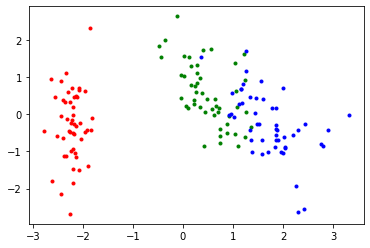

In [31]:
plt.plot(df2['pc1'][df['target'] == 0],
         df2['pc2'][df['target'] == 0],'r.')
plt.plot(df2['pc1'][df['target'] == 1],
         df2['pc2'][df['target'] == 1],'g.')
plt.plot(df2['pc1'][df['target'] == 2],
         df2['pc2'][df['target'] == 2],'b.')

In [32]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
xpca = pca.fit_transform(xsd)
xpca
df3 = pd.DataFrame(xpca, columns=['pc1','pc2'])
df3['target'] = df['target']
df3.head()

,pc1,pc2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Text(0.5, 1.0, 'Hitungan sklearn')

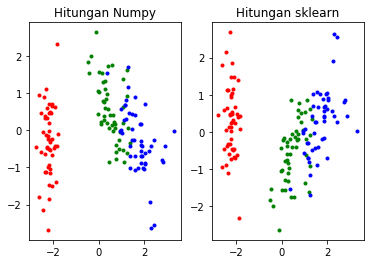

In [34]:
plt.subplot(121)
plt.plot(df2['pc1'][df['target'] == 0],
         df2['pc2'][df['target'] == 0],'r.')
plt.plot(df2['pc1'][df['target'] == 1],
         df2['pc2'][df['target'] == 1],'g.')
plt.plot(df2['pc1'][df['target'] == 2],
         df2['pc2'][df['target'] == 2],'b.')
plt.title("Hitungan Numpy")

plt.subplot(122)
plt.plot(df3['pc1'][df['target'] == 0],
         df3['pc2'][df['target'] == 0],'r.')
plt.plot(df3['pc1'][df['target'] == 1],
         df3['pc2'][df['target'] == 1],'g.')
plt.plot(df3['pc1'][df['target'] == 2],
         df3['pc2'][df['target'] == 2],'b.')
plt.title('Hitungan sklearn')